In [1]:
import tensorflow as tf
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
RANDOM_SEED = 42

2023-03-14 23:37:14.520607: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-14 23:37:14.827791: I tensorflow/core/util/port.cc:104] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-03-14 23:37:14.835232: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-03-14 23:37:14.835265: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore 

In [2]:
dataset = 'cords.csv'
model_save_path = 'saved_model/'
NUM_CLASSES = 28

In [3]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (21 * 2) + 1)))

In [4]:

y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))
print(y_dataset)


[0 0 0 ... 4 4 4]


In [17]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED)
print(y_train)

[18 27  3 ...  1 21 12]


In [18]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((21 * 2, )),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(28, activation='softmax')
])

In [19]:
# Model checkpoint callback
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False)
# Callback for early stopping
es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)


In [20]:
# Model compilation
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Training

In [23]:
model.fit(
    X_train,
    y_train,
    epochs=10,
    batch_size=125,
    validation_data=(X_test, y_test),
)



Epoch 1/10
97/97 [==============================] - 0s 4ms/step - loss: 0.0124 - accuracy: 0.9982 - val_loss: 0.0374 - val_accuracy: 0.9973
Epoch 2/10
97/97 [==============================] - 0s 4ms/step - loss: 0.0120 - accuracy: 0.9977 - val_loss: 0.0378 - val_accuracy: 0.9980
Epoch 3/10
97/97 [==============================] - 0s 4ms/step - loss: 0.0115 - accuracy: 0.9984 - val_loss: 0.0370 - val_accuracy: 0.9978
Epoch 4/10
97/97 [==============================] - 0s 4ms/step - loss: 0.0116 - accuracy: 0.9981 - val_loss: 0.0373 - val_accuracy: 0.9970
Epoch 5/10
97/97 [==============================] - 0s 4ms/step - loss: 0.0117 - accuracy: 0.9981 - val_loss: 0.0378 - val_accuracy: 0.9973
Epoch 6/10
97/97 [==============================] - 0s 4ms/step - loss: 0.0114 - accuracy: 0.9979 - val_loss: 0.0384 - val_accuracy: 0.9980
Epoch 7/10
97/97 [==============================] - 1s 5ms/step - loss: 0.0110 - accuracy: 0.9984 - val_loss: 0.0383 - val_accuracy: 0.9968
Epoch 8/10
97/97 [==

In [24]:
val_loss, val_acc = model.evaluate(X_test, y_test, batch_size=100)

41/41 [==============================] - 0s 3ms/step - loss: 0.0374 - accuracy: 0.9983


<!-- TODO : add loss function convergence graph for presentation -->

In [25]:

index = 77
print(np.array(X_test))
print(y_test[index])
predict_result = model.predict(np.array([X_test[index]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

[[ 0.          0.         -0.30150753 ... -0.5477387  -0.20100503
  -0.41708544]
 [ 0.          0.          0.21576764 ... -0.75518674 -0.00829876
  -0.8589212 ]
 [ 0.          0.         -0.28502417 ... -0.02415459 -0.38164252
  -0.07729468]
 ...
 [ 0.          0.          0.30120483 ... -0.39156628  0.2951807
  -0.37349397]
 [ 0.          0.          0.26288658 ... -0.44329897  0.05670103
  -0.41237113]
 [ 0.          0.         -0.30827066 ... -0.6766917  -0.10526316
  -0.60902256]]
24
1/1 [==============================] - 0s 174ms/step
[2.10672313e-13 1.84912137e-14 1.60844207e-22 0.00000000e+00
 3.69798676e-16 8.64680914e-08 1.16521537e-09 2.77663892e-10
 3.47078029e-26 7.03207974e-04 1.89841498e-09 7.39432900e-23
 5.91395260e-13 4.58894319e-05 9.23546668e-06 6.37164000e-14
 4.88463400e-07 1.10864768e-17 3.52362362e-10 1.00764046e-04
 1.85232523e-06 0.00000000e+00 3.01402376e-14 5.58784673e-20
 9.99138474e-01 1.45350242e-11 5.46612859e-11 4.72510580e-17]
24


In [26]:
model.save(model_save_path)

INFO:tensorflow:Assets written to: saved_model/assets


INFO:tensorflow:Assets written to: saved_model/assets


127/127 [==============================] - 0s 2ms/step


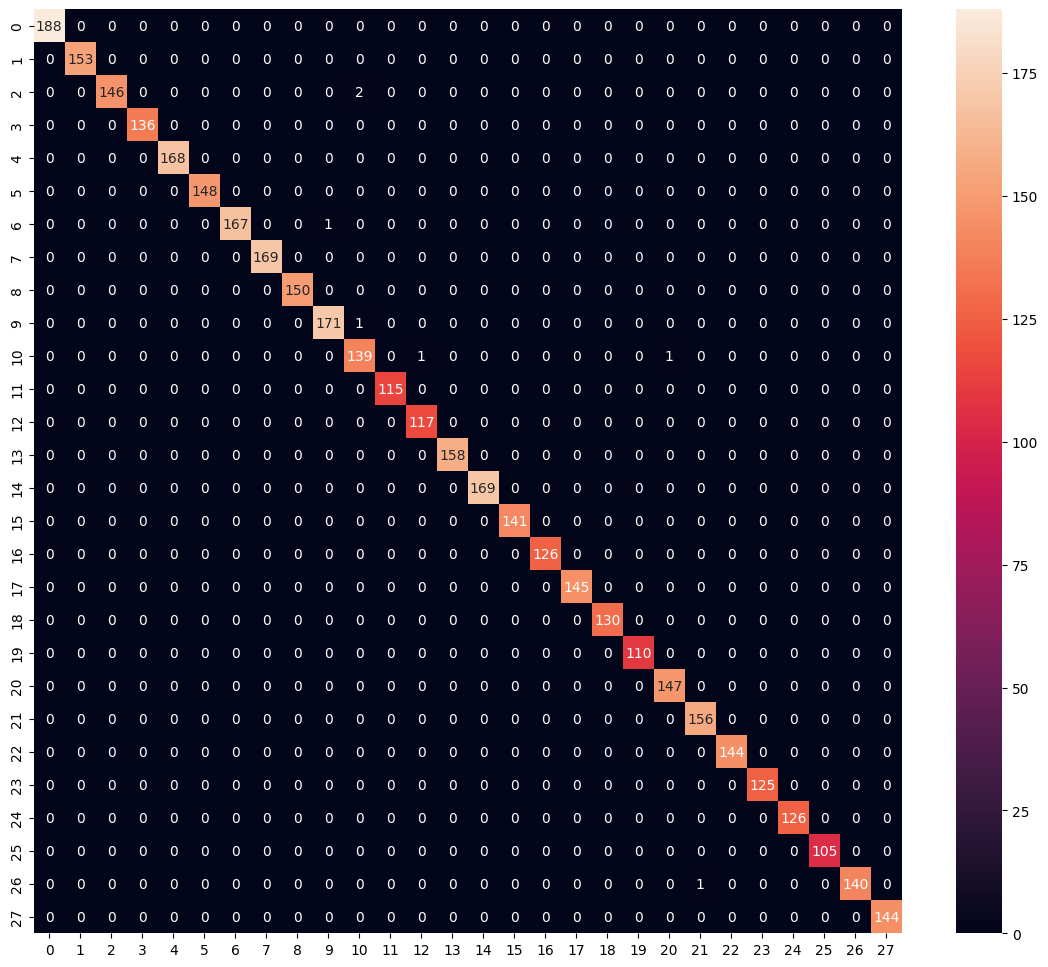

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       188
           1       1.00      1.00      1.00       153
           2       1.00      0.99      0.99       148
           3       1.00      1.00      1.00       136
           4       1.00      1.00      1.00       168
           5       1.00      1.00      1.00       148
           6       1.00      0.99      1.00       168
           7       1.00      1.00      1.00       169
           8       1.00      1.00      1.00       150
           9       0.99      0.99      0.99       172
          10       0.98      0.99      0.98       141
          11       1.00      1.00      1.00       115
          12       0.99      1.00      1.00       117
          13       1.00      1.00      1.00       158
          14       1.00      1.00      1.00       169
          15       1.00      1.00      1.00       141
          16       1.00      1.00      1.00       126
     

In [27]:
def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(14, 12))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)